# Analyzing Model Grids / Monte Carlo Simulations

Once you have a model grid in hand, there are a slew of built-in analysis 
routines that you might consider using. For the rest of this example,
we'll assume you have completed the [Example 2-D Grid](example_grid), and have the associated set of files
with prefix ``test_2d_grid``. 

To begin, initialize an instance of the analysis class, ``ModelSet``: 

In [1]:
import ares

anl = ares.analysis.ModelSet('test_2d_grid')


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_2d_grid                                                                           ####
#### N-d         : 2                                                                                      ####


First, let's verify that we've surveyed the part of parameter space we 
intended to: 

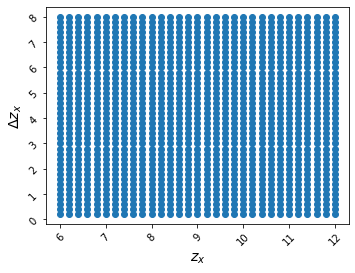

In [2]:
ax = anl.Scatter(anl.parameters)

## Basic Inspection

Now, the kind of analysis you can do will be limited by what quantities
were saved for each model. Recall (from [Example 2-D Grid](example_grid)) that we have 
the following quantities at our disposal:

* 21-cm brightness temperature, ``dTb``.
* Kinetic temperature of the IGM, ``igm_Tk``.
* HII region volume filling factor, ``cgm_h_2``.
* CMB optical depth, ``tau_e``.
* Position of 21-cm emission maximum, ``z_D`` and ``dTb_D``.

Let's have a look at how the ionization history depends on our two parameters of
interest in this example, ``tanh_xz0`` and ``tanh_xdz``,


# Loaded test_2d_grid.000.blob_1d.cgm_h_2.pkl


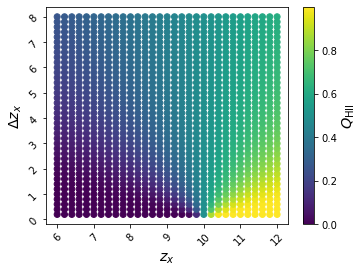

In [3]:
ax = anl.Scatter(['tanh_xz0', 'tanh_xdz'], c='cgm_h_2', ivar=[None,None,10], fig=2, edgecolors='none')

**NOTE:** All ``ModelSet`` functions accept ``fig`` as an optional keyword 
    argument, which you can set to any integer to open plots in a new window.    

The keyword argument ``ivar`` is short for "independent variables" -- it is ``None`` by default. However, because we have chosen to plot ``cgm_h_2``, which is a 1-D blob, we must specify the redshift of interest. Recall that we have access to integer redshifts in the interval $5 \leq z \leq 20$, or check for yourself:

In [5]:
print(anl.blob_ivars)

(None, [array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])])


So our choice of $z=10$ should be OK.  

If you forget what fields are available for analysis, see:

In [6]:
print(anl.blob_names, anl.blob_ivars)

(['z_D', 'dTb_D', 'tau_e'], ['cgm_h_2', 'igm_Tk', 'dTb']) (None, [array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])])


**NOTE:** Calling quantities of interest `blobs` was inspired by the arbitrary meta-data blobs in [emcee](http://dan.iel.fm/emcee/current/).   
 
For more 21-cm-focused analyses, you may want to view how the extrema in the
global 21-cm signal change as a function of the model parameters:

# Loaded test_2d_grid.000.blob_0d.z_D.pkl
# Loaded test_2d_grid.000.blob_0d.dTb_D.pkl


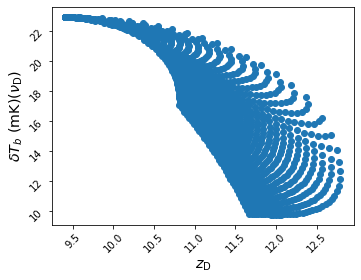

In [8]:
# Scatterplot showing where emission peak occurs
ax = anl.Scatter(['z_D', 'dTb_D'], fig=4)

or, color-code points by CMB optical depth,

# Loaded test_2d_grid.000.blob_0d.tau_e.pkl


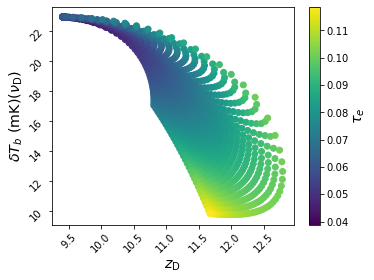

In [9]:
ax = anl.Scatter(['z_D', 'dTb_D'], c='tau_e', fig=5, edgecolors='none')

You can also create your own derived quantities. A very simple example is to convert redshifts to observed frequencies,

In [10]:
# 1420.4057 is the rest frequency of the 21-cm line in MHz
anl.DeriveBlob(expr='1420.4057 / (1. + x)', varmap={'x': 'z_D'}, name='nu_D')

masked_array(data=[136.43962086618077, 136.4395602206665,
                   136.4213637970313, ..., 111.59846749404792,
                   111.8355833582385, 112.06807146360116],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

This will create a new blob, called ``nu_D``, that can be used for subsequent analysis. For example,

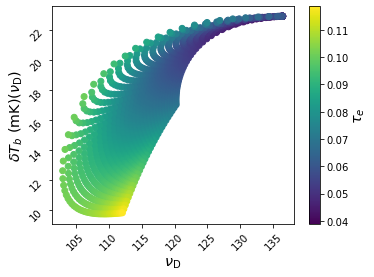

In [12]:
# Scatterplot showing where emission peak occurs
ax = anl.Scatter(['nu_D', 'dTb_D'], c='tau_e', fig=6, edgecolors='none')

## Problem Realizations

You may have noticed that in this model grid there are three realizations whose emission maxima seem to occur at $\delta T_b \approx 0$. In general, this is possible, but given the regularity of the grid points in parameter space it seems unlikely that any individual model would stray substantially from the locus of all other models.

To inspect potentially problematic realizations, it is first useful to isolate them from the rest. You can select them visually by first invoking (**NOTE:** this won't work in a Jupyter notebook):

In [14]:
anl.SelectModels()

and then clicking and dragging within the plot window to define a rectangle, starting from its upper left corner (click) and ending with its bottom right corner (release). The set of models bounded by this rectangle will be saved as a new ``ModelSet`` object that can be used just like the original one. Each successive "slice" will be saved as attributes ``slice_0``, ``slice_1``, etc. that you can assign to a new variable, as, e.g.

In [16]:
#slc0 = anl.slice_0
#slc0.Scatter(['nu_D', 'dTb_D'], c='tau_e', fig=7, edgecolors='none')

Alternatively, you can specify a rectangle by hand. For example, 

In [17]:
slc = anl.Slice([100, 120, 0, 10], pars=['nu_D', 'dTb_D'])


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_2d_grid                                                                           ####
#### N-d         : 2                                                                                      ####


extracts all models with ``100 <= nu_D <= 120`` and ``0 <= dTb_D <= 10``. Check:

# Loaded test_2d_grid.000.blob_0d.dTb_D.pkl
# Loaded test_2d_grid.000.blob_0d.tau_e.pkl


<AxesSubplot:xlabel='$\\nu_{\\mathrm{D}}$', ylabel='$\\delta T_b \\ (\\mathrm{mK})(\\nu_{\\mathrm{D}})$'>

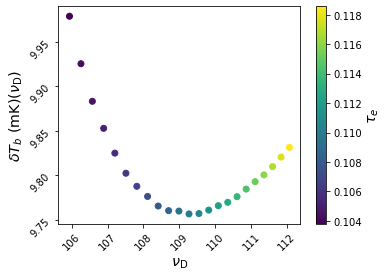

In [18]:
slc.Scatter(['nu_D', 'dTb_D'], c='tau_e', fig=8, edgecolors='none')

If you wanted to examine models in more detail, you could re-run them. Collecting the parameter dictionaries required to do so is easy

In [19]:
kwargs_list = slc.AssembleParametersList(include_bkw=True)

This routine returns a list in which each element is a dictionary of parameters for a single model. The keyword argument ``include_bkw`` controls whether the "base kwargs," i.e., those that are shared by all models in the grid, are included in each list element. If they are (as above), then any individual dictionary can be used to initialize a simulation. For example:


In [ ]:
ax = None
for kwargs in kwargs_list[0:3]:
    sim = ares.simulations.Global21cm(**kwargs)
    sim.run()
    ax, zax = sim.GlobalSignature(color='b', alpha=0.5, ax=ax)

If you've got models that seem to have something wrong with them, sending me the dictionary (or a list of them as above) will help a lot. Just do something like:

In [ ]:
import pickle
    f = open('problematic_models.pkl', 'wb')
    pickle.dump(kwargs_list, f)
    f.close()